In [1]:
import requests
import sys
import pandas as pd
import time
from datetime import date, timedelta
import socket
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from scipy import stats
import urllib
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
smoke_data=pd.read_csv("Active_Tobacco_Retailer_Map.csv")
smoke_data.head()

,LOCAL HEALTH UNIT,OPERATION NAME,CITY,STATE,ZIP,MUNICIPALITY,COUNTY,VENDOR TYPE,CREATION DATE,LOCATION
0,NYC,243 W 34TH ST RETAIL CORP,NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,CONVENIENCE STORE,11/10/2020,"243 WEST 34TH STREET\nNEW YORK, NY 10001\n(40...."
1,NYC,"KDEANSKY, MARILYN",NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,TOBACCO RETAIL,11/10/2020,"N/W/C WEST 34TH ST & 7TH AVENUE\nNEW YORK, NY ..."
2,NYC,32ND STREET NEWS STAND INC.,NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,OTHER,11/10/2020,"39 WEST 32ND STREET\nNEW YORK, NY 10001\n(40.7..."
3,NYC,HOOKAH PLUS INC,NEW YORK,NY,10001,NEW YORK CITY,NEW YORK CITY,GROCERY SUPERMARKET,11/10/2020,"11 WEST 27TH STREET\nNEW YORK, NY 10001\n(40.7..."
4,NYC,HEADLINE NEWS II INC,NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,GROCERY SUPERMARKET,11/10/2020,"152 WEST 31ST STREET\nNEW YORK, NY 10001\n(40...."


In [3]:
smoke_data["LOCATION"]

0       243 WEST 34TH STREET\nNEW YORK, NY 10001\n(40....
1       N/W/C WEST 34TH ST & 7TH AVENUE\nNEW YORK, NY ...
2       39 WEST 32ND STREET\nNEW YORK, NY 10001\n(40.7...
3       11 WEST 27TH STREET\nNEW YORK, NY 10001\n(40.7...
4       152 WEST 31ST STREET\nNEW YORK, NY 10001\n(40....
                              ...                        
9298    206    BEACH 116TH STREET\nROCKAWAY PARK, NY 1...
9299    186 BEACH 116TH  STREET\nROCKAWAY  PARK, NY 11...
9300    206 BEACH 116TH STREET\nROCKAWAY, NY 11694\n(4...
9301    413 BEACH 129TH STREET\nBELLE HABOR, NY 11694\...
9302    202-36 ROCKAWAY POINT BOULEVARD\nROCKAWAY POIN...
Name: LOCATION, Length: 9303, dtype: object

In [4]:
smoke_data.columns

Index(['LOCAL HEALTH UNIT', 'OPERATION NAME', 'CITY', 'STATE', 'ZIP',
       'MUNICIPALITY', 'COUNTY', 'VENDOR TYPE', 'CREATION DATE', 'LOCATION'],
      dtype='object')

In [5]:
smoke_data['LOCATION'][1].split("\n")[2].replace("(", "").replace(")", "").split(",")[0]

'40.750980033000076'

In [6]:
smoke_data.shape

(9303, 10)

In [7]:
smoke_data['LONGITUDE']=0
smoke_data['LATITUDE']=0

In [8]:
smoke_data.columns

Index(['LOCAL HEALTH UNIT', 'OPERATION NAME', 'CITY', 'STATE', 'ZIP',
       'MUNICIPALITY', 'COUNTY', 'VENDOR TYPE', 'CREATION DATE', 'LOCATION',
       'LONGITUDE', 'LATITUDE'],
      dtype='object')

In [9]:
import pandas as pd

# read in smoke_data DataFrame from CSV file
smoke_data = pd.read_csv("Active_Tobacco_Retailer_Map.csv")

for x in smoke_data.index:
   smoke_data.loc[x, 'LATITUDE']=smoke_data['LOCATION'][x].split("\n")[2].replace("(", "").replace(")", "").split(",")[0]
   smoke_data.loc[x, 'LONGITUDE']=smoke_data['LOCATION'][x].split("\n")[2].replace("(", "").replace(")", "").split(",")[1]

# print the updated DataFrame
smoke_data.head()

,LOCAL HEALTH UNIT,OPERATION NAME,CITY,STATE,ZIP,MUNICIPALITY,COUNTY,VENDOR TYPE,CREATION DATE,LOCATION,LATITUDE,LONGITUDE
0,NYC,243 W 34TH ST RETAIL CORP,NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,CONVENIENCE STORE,11/10/2020,"243 WEST 34TH STREET\nNEW YORK, NY 10001\n(40....",40.751790018000065,-73.99211998699997
1,NYC,"KDEANSKY, MARILYN",NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,TOBACCO RETAIL,11/10/2020,"N/W/C WEST 34TH ST & 7TH AVENUE\nNEW YORK, NY ...",40.750980033000076,-73.99058995499996
2,NYC,32ND STREET NEWS STAND INC.,NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,OTHER,11/10/2020,"39 WEST 32ND STREET\nNEW YORK, NY 10001\n(40.7...",40.74805001300007,-73.98738396099998
3,NYC,HOOKAH PLUS INC,NEW YORK,NY,10001,NEW YORK CITY,NEW YORK CITY,GROCERY SUPERMARKET,11/10/2020,"11 WEST 27TH STREET\nNEW YORK, NY 10001\n(40.7...",40.744290017000026,-73.98805099299994
4,NYC,HEADLINE NEWS II INC,NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,GROCERY SUPERMARKET,11/10/2020,"152 WEST 31ST STREET\nNEW YORK, NY 10001\n(40....",40.748849982000024,-73.99170198199994


In [10]:
smoke_data.to_csv('smoke_data.csv')

In [11]:
smoke_data.drop(['COUNTY','STATE','CITY','LOCAL HEALTH UNIT','LOCATION','MUNICIPALITY','CREATION DATE','OPERATION NAME'],axis=1, inplace=True)
smoke_data = smoke_data.rename(columns={'ZIP': 'ZIPCODE'})
smoke_data.head()

,ZIPCODE,VENDOR TYPE,LATITUDE,LONGITUDE
0,10001,CONVENIENCE STORE,40.751790018000065,-73.99211998699997
1,10001,TOBACCO RETAIL,40.750980033000076,-73.99058995499996
2,10001,OTHER,40.74805001300007,-73.98738396099998
3,10001,GROCERY SUPERMARKET,40.744290017000026,-73.98805099299994
4,10001,GROCERY SUPERMARKET,40.748849982000024,-73.99170198199994


In [12]:
zips = gpd.read_file('ZIP_CODE_040114/ZIP_CODE_040114.shp')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [13]:
smoke_data1=pd.read_csv("smoke_data.csv")

In [14]:
geometry = [Point(xy) for xy in zip(smoke_data1.LONGITUDE, smoke_data1.LATITUDE)]
data_geo=smoke_data1.drop(['LATITUDE','LONGITUDE'],axis=1)
geonew = gpd.GeoDataFrame(data_geo,geometry=geometry,crs={'init': 'epsg:4326'})

geonew.drop(['Unnamed: 0'],axis=1, inplace=True)
geonew.reset_index(drop=True,inplace=True)
geonew.head()

,LOCAL HEALTH UNIT,OPERATION NAME,CITY,STATE,ZIP,MUNICIPALITY,COUNTY,VENDOR TYPE,CREATION DATE,LOCATION,geometry
0,NYC,243 W 34TH ST RETAIL CORP,NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,CONVENIENCE STORE,11/10/2020,"243 WEST 34TH STREET\nNEW YORK, NY 10001\n(40....",POINT (-73.99212 40.75179)
1,NYC,"KDEANSKY, MARILYN",NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,TOBACCO RETAIL,11/10/2020,"N/W/C WEST 34TH ST & 7TH AVENUE\nNEW YORK, NY ...",POINT (-73.99059 40.75098)
2,NYC,32ND STREET NEWS STAND INC.,NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,OTHER,11/10/2020,"39 WEST 32ND STREET\nNEW YORK, NY 10001\n(40.7...",POINT (-73.98738 40.74805)
3,NYC,HOOKAH PLUS INC,NEW YORK,NY,10001,NEW YORK CITY,NEW YORK CITY,GROCERY SUPERMARKET,11/10/2020,"11 WEST 27TH STREET\nNEW YORK, NY 10001\n(40.7...",POINT (-73.98805 40.74429)
4,NYC,HEADLINE NEWS II INC,NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,GROCERY SUPERMARKET,11/10/2020,"152 WEST 31ST STREET\nNEW YORK, NY 10001\n(40....",POINT (-73.99170 40.74885)


In [15]:
zips.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
smoke_data1=gpd.sjoin(geonew.to_crs({'init':'epsg:2263'}),zips,op='within',how='inner')
smoke_data1.head()

,LOCAL HEALTH UNIT,OPERATION NAME,CITY,STATE_left,ZIP,MUNICIPALITY,COUNTY_left,VENDOR TYPE,CREATION DATE,LOCATION,...,PO_NAME,POPULATION,AREA,STATE_right,COUNTY_right,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
0,NYC,243 W 34TH ST RETAIL CORP,NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,CONVENIENCE STORE,11/10/2020,"243 WEST 34TH STREET\nNEW YORK, NY 10001\n(40....",...,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
1,NYC,"KDEANSKY, MARILYN",NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,TOBACCO RETAIL,11/10/2020,"N/W/C WEST 34TH ST & 7TH AVENUE\nNEW YORK, NY ...",...,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
2,NYC,32ND STREET NEWS STAND INC.,NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,OTHER,11/10/2020,"39 WEST 32ND STREET\nNEW YORK, NY 10001\n(40.7...",...,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
3,NYC,HOOKAH PLUS INC,NEW YORK,NY,10001,NEW YORK CITY,NEW YORK CITY,GROCERY SUPERMARKET,11/10/2020,"11 WEST 27TH STREET\nNEW YORK, NY 10001\n(40.7...",...,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
4,NYC,HEADLINE NEWS II INC,NEW YORK,NY,10001,MANHATTAN,NEW YORK CITY,GROCERY SUPERMARKET,11/10/2020,"152 WEST 31ST STREET\nNEW YORK, NY 10001\n(40....",...,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0


In [17]:
smoke_data1 = gpd.sjoin(geonew.to_crs({'init': 'epsg:2263'}), zips, op='within', how='inner')
smoke_data1 = smoke_data1.rename(columns={'ZIPCODE_left': 'ZIPCODE'})

In [18]:
sanity = ['ZIPCODE','geometry','VENDOR TYPE']
smoke_data1=smoke_data1[sanity]
smoke_data1.reset_index(drop=True,inplace=True)
smoke_data1.head()

,ZIPCODE,geometry,VENDOR TYPE
0,10001,POINT (986433.279 213174.146),CONVENIENCE STORE
1,10001,POINT (986857.230 212879.084),TOBACCO RETAIL
2,10001,POINT (987745.664 211811.695),OTHER
3,10001,POINT (987561.029 210441.783),GROCERY SUPERMARKET
4,10001,POINT (986549.195 212103.007),GROCERY SUPERMARKET


In [19]:
smoke_data1.to_csv('smoke_data1.csv')

In [20]:
smoke_data1_grouped = smoke_data1.groupby(['ZIPCODE', 'VENDOR TYPE']).size().reset_index(name='COUNT')
smoke_data1_grouped

,ZIPCODE,VENDOR TYPE,COUNT
0,10001,BAR/LOUNGE,3
1,10001,CONVENIENCE STORE,14
2,10001,CONVENIENCE/GAS,2
3,10001,DELICATESSEN,2
4,10001,GROCERY SUPERMARKET,40
...,...,...,...
1040,11694,BAR/LOUNGE,1
1041,11694,CONVENIENCE STORE,2
1042,11694,GROCERY SUPERMARKET,14
1043,11694,RESTAURANT/ATUPA,1


In [21]:
smoke_data1_grouped = smoke_data1_grouped.groupby('ZIPCODE').count()
smoke_data1_grouped

,VENDOR TYPE,COUNT
ZIPCODE,,
10001,9,9
10002,6,6
10003,7,7
10004,6,6
10005,4,4
...,...,...
11691,6,6
11692,2,2
11693,4,4


Text(0.5, 1.0, 'Vendor Type by Zip Code')

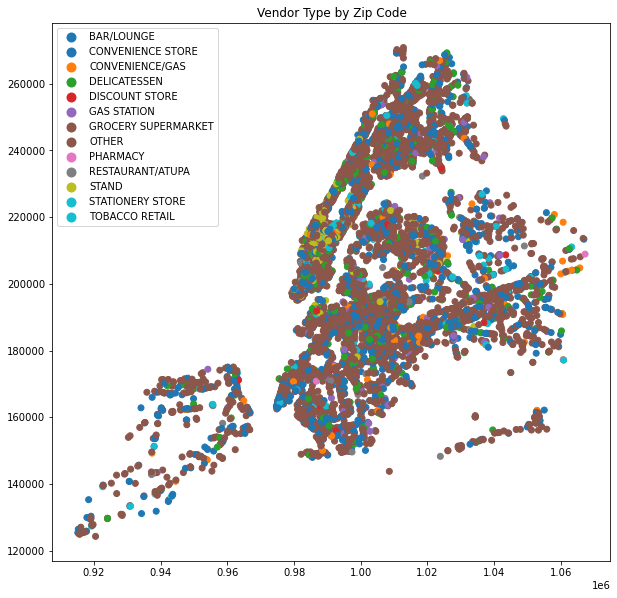

In [25]:
smoke_data1_grouped = gpd.sjoin(geonew.to_crs({'init': 'epsg:2263'}), zips, op='within', how='inner')
smoke_data1_grouped.plot(figsize = (10,10),column = 'VENDOR TYPE',legend=True).set_title("Vendor Type by Zip Code")

In [26]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [30]:
import folium
from folium.plugins import HeatMap

# Create a map object centered on New York City
map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Create a HeatMap object using the latitude and longitude columns of the data
heatmap_data = smoke_data[['LATITUDE', 'LONGITUDE']].values.tolist()
HeatMap(heatmap_data).add_to(map)

# Display the map
map

In [31]:
map.save('smoke_data_heatmap.html')